# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [1]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))


No of Features: 561


## Obtain the  train data 

In [3]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

C:\Users\Sai charan\Anaconda3\envs\tfgpu\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2747,0.25184,0.023233,-0.100876,-0.970059,-0.86912,-0.917534,-0.977375,-0.889836,-0.922856,-0.921267,...,0.080159,0.065918,0.742561,-0.594226,-0.868515,0.0042,0.029664,15,4,SITTING


In [4]:
train.shape

(7352, 564)

## Obtain the  test data 

In [5]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2305,0.22952,-0.023987,-0.09118,-0.985721,-0.963346,-0.968839,-0.987234,-0.966719,-0.968958,-0.933557,...,-0.002054,0.085991,0.315707,-0.1196,0.589713,-0.589335,-0.41429,20,6,LAYING


In [6]:
test.shape

(2947, 564)

# Data Cleaning

## 1. Check for Duplicates

In [7]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [8]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

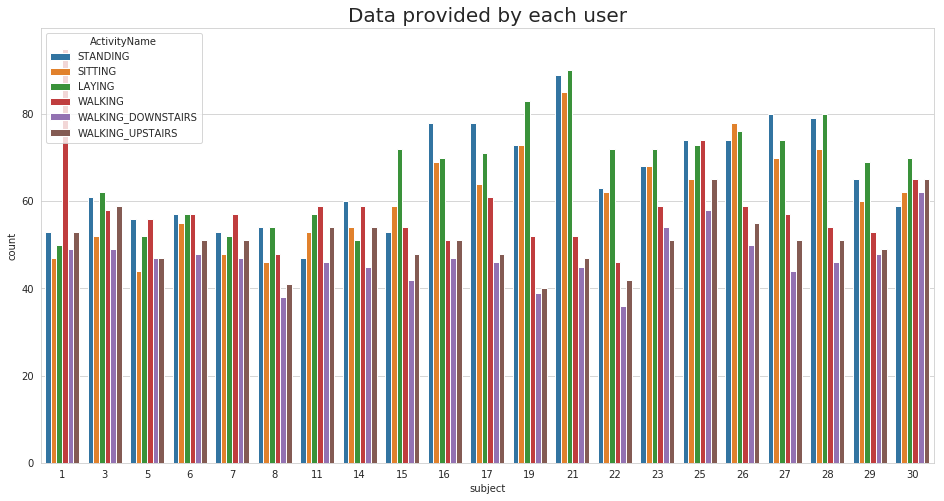

In [10]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


> We have got almost same number of reading from all the subjects

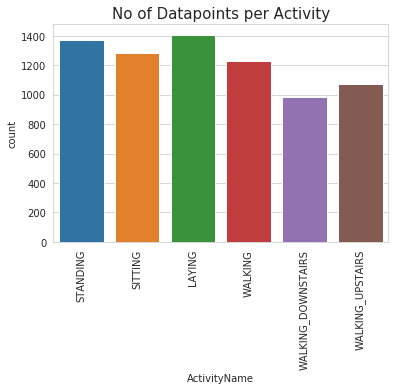

In [11]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)

## 4. Changing feature names 

In [12]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in a csv files

In [13]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

# Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

C:\Users\Sai charan\Anaconda3\envs\tfgpu\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


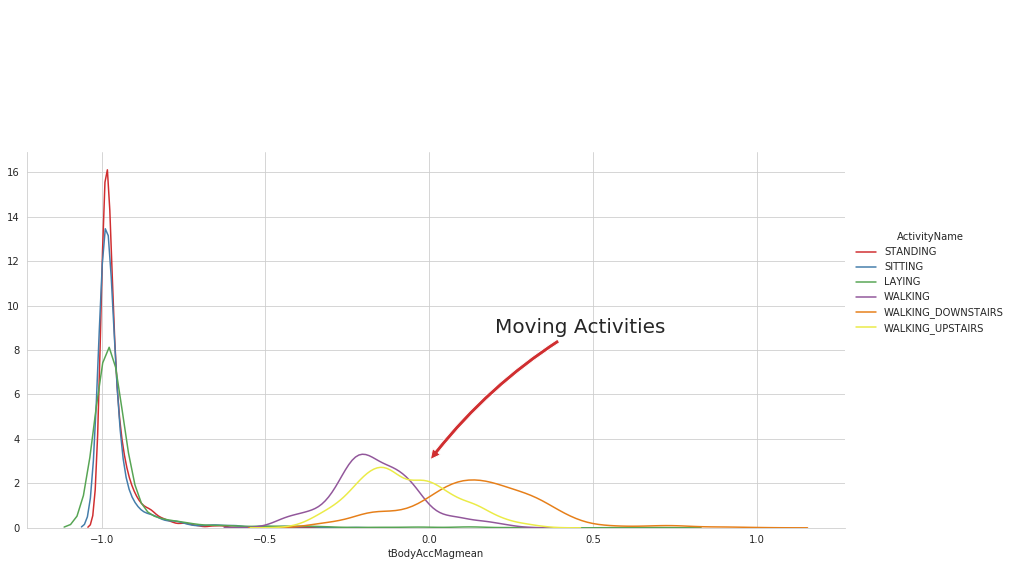

In [14]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

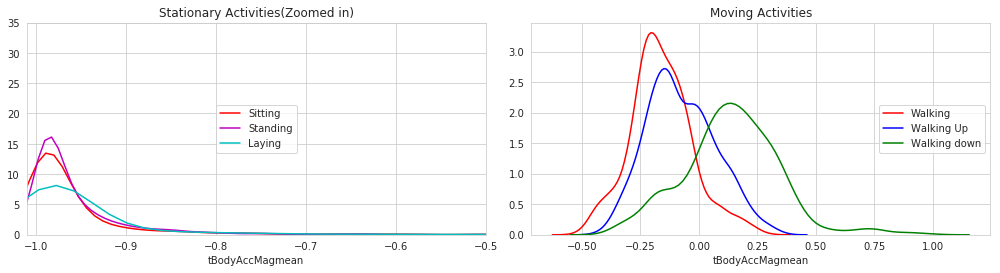

In [15]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

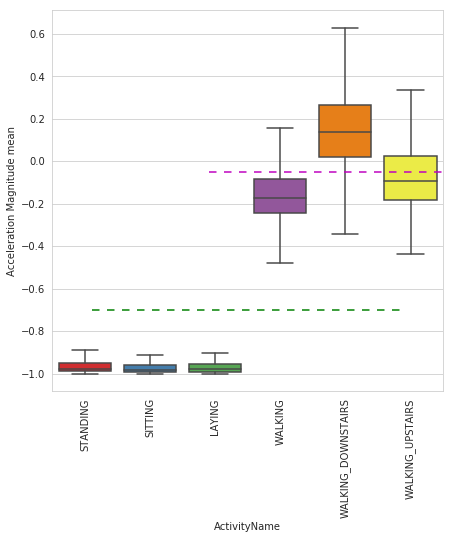

In [16]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

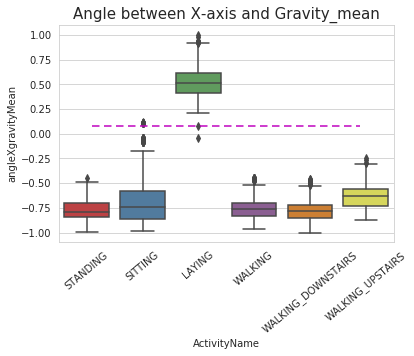

In [17]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

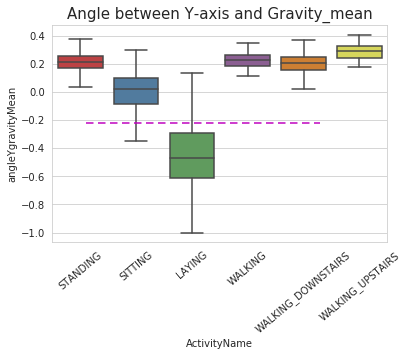

In [18]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data 

In [19]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.441s...
[t-SNE] Computed neighbors for 7352 samples in 43.977s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.075s
[t-SNE] Iteration 50: error = 124.7599258, gradient norm = 0.0277828 (50 iterations in 7.061s)
[t-SNE] Iteration 100: error = 107.5338058, gradient norm = 0.0282337 (50 iterations in

C:\Users\Sai charan\Anaconda3\envs\tfgpu\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


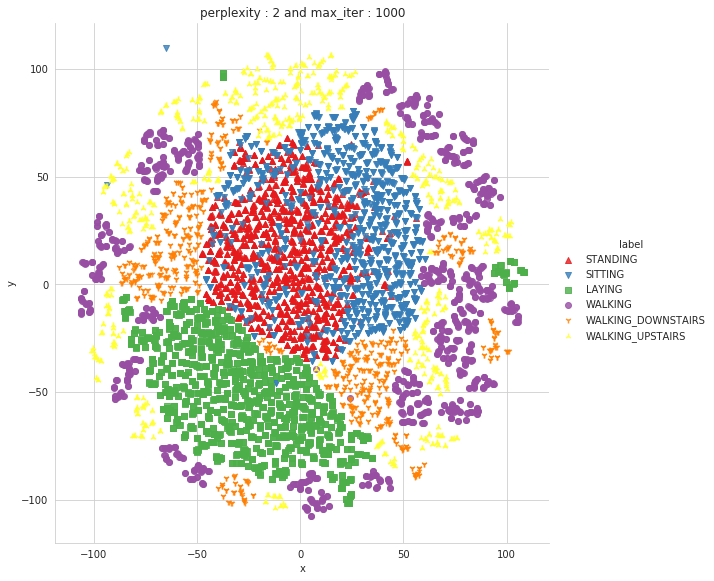

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.313s...
[t-SNE] Computed neighbors for 7352 samples in 47.406s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.054s
[t-SNE] Iteration 50: error = 114.0418243, gradient norm = 0.0201805 (50 iterations in 8.929s)
[t-SNE] Iteration 100: error = 97.7264938, gradient norm = 0.0162925 (50 iteratio

C:\Users\Sai charan\Anaconda3\envs\tfgpu\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


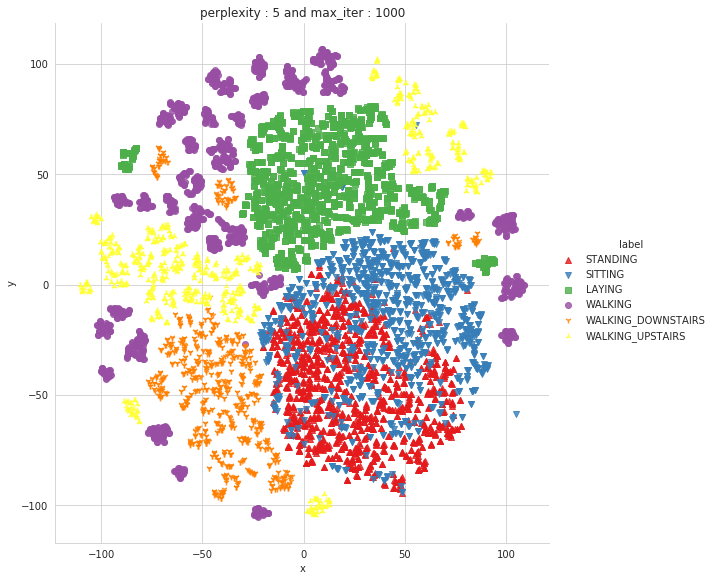

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.446s...
[t-SNE] Computed neighbors for 7352 samples in 47.830s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.121s
[t-SNE] Iteration 50: error = 105.5733109, gradient norm = 0.0224684 (50 iterations in 4.787s)
[t-SNE] Iteration 100: error = 90.1599426, gradient norm = 0.0093250 (50 iterati

C:\Users\Sai charan\Anaconda3\envs\tfgpu\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


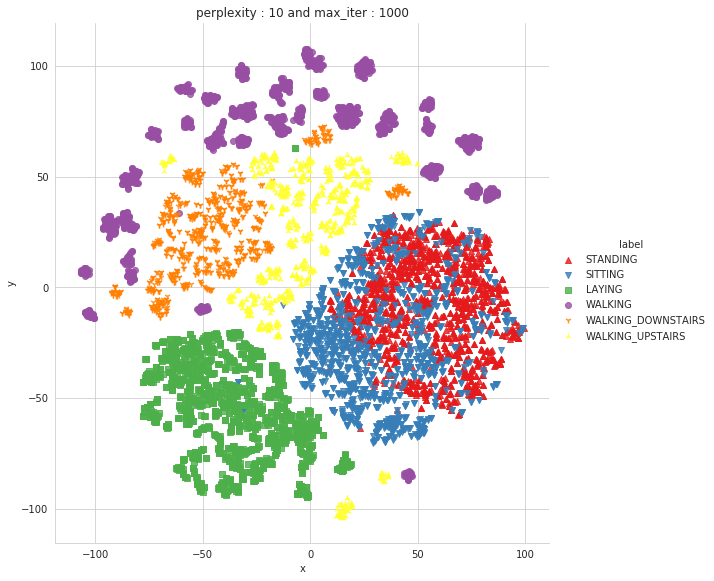

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.371s...
[t-SNE] Computed neighbors for 7352 samples in 46.267s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.180s
[t-SNE] Iteration 50: error = 97.6689911, gradient norm = 0.0161598 (50 iterations in 5.970s)
[t-SNE] Iteration 100: error = 84.2519455, gradient norm = 0.0072936 (50 iteratio

C:\Users\Sai charan\Anaconda3\envs\tfgpu\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


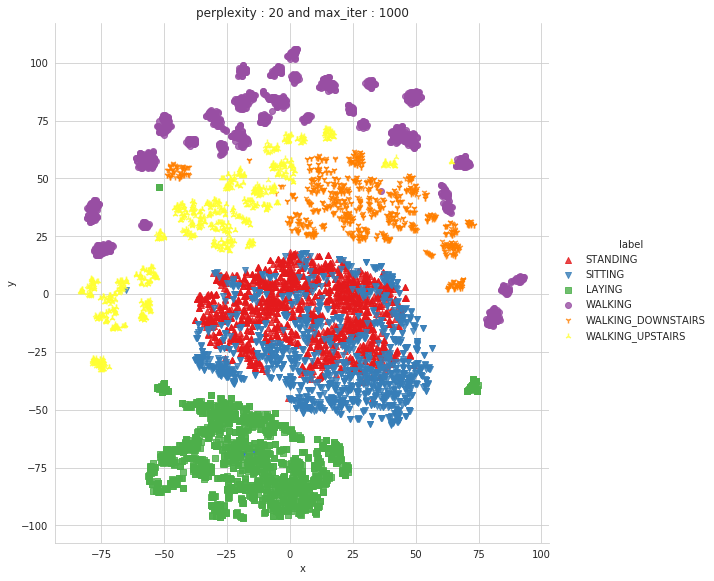

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.301s...
[t-SNE] Computed neighbors for 7352 samples in 49.311s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.587s
[t-SNE] Iteration 50: error = 86.7748413, gradient norm = 0.0176051 (50 iterations in 6.357s)
[t-SNE] Iteration 100: error = 75.5151291, gradient norm = 0.0043438 (50 iterati

C:\Users\Sai charan\Anaconda3\envs\tfgpu\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


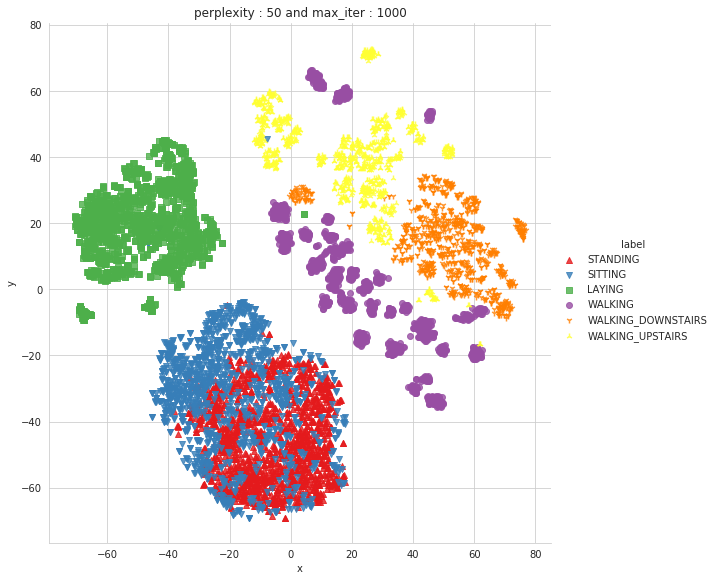

Done


In [25]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

# Apply Machine Learning Models

In [20]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [21]:
x_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

# get x_test and y_test from test csv file
x_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

print('x_train and y_train : ({},{})'.format(x_train.shape, y_train.shape))
print('x_test  and y_test  : ({},{})'.format(x_test.shape, y_test.shape))

x_train and y_train : ((7352, 561),(7352,))
x_test  and y_test  : ((2947, 561),(2947,))


In [22]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

# Function to plot the confusion matrix

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

# Method to print the gridsearch Attribute

In [25]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [26]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import itertools
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'DejaVu Sans'
import seaborn as sns

# To be able to save images on server
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM , BatchNormalization
from keras.layers.core import Dense, Dropout
from keras.regularizers import L1L2



Using TensorFlow backend.


# Logistic Regression with Grid Search

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.7min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:01:50.251321


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.231398


---------------------
|      Accuracy      |
---------------------

    0.9630132337970818


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  57   0   0   4]
 [  0  11 520   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]
-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

         micro avg       0.96      0.96      0.96 

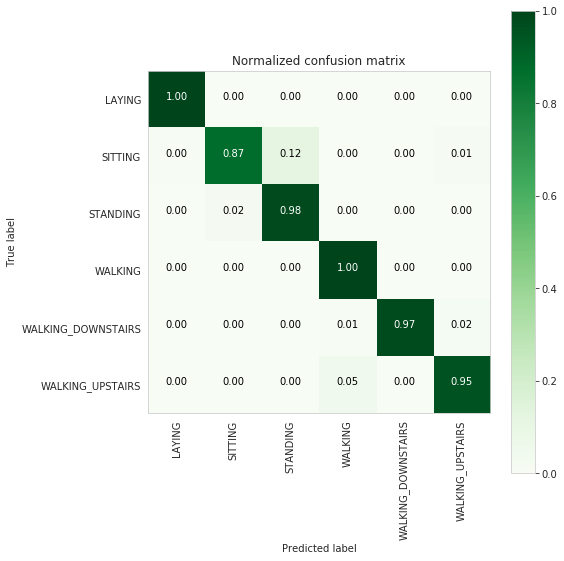

In [33]:
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, x_train, y_train, x_test, y_test, class_labels=labels)

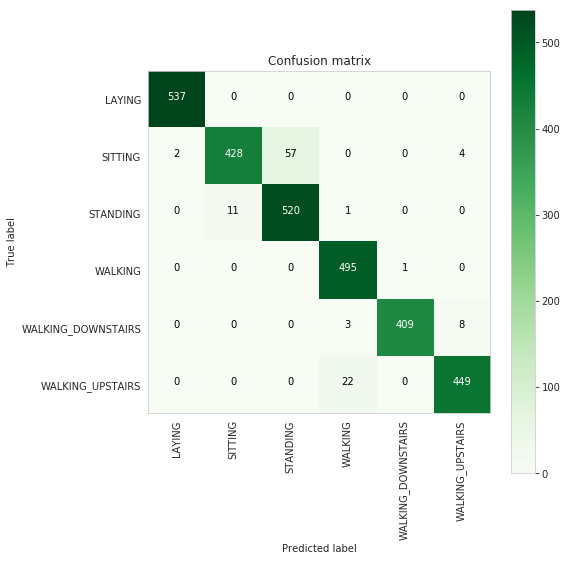

In [34]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [35]:
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9458650707290533



# Linear SVC with GridSearch

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   33.5s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:38.990243


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.007981


---------------------
|      Accuracy      |
---------------------

    0.9681031557516118


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  3 440  43   0   0   5]
 [  0  21 511   0   0   0]
 [  0   0   0 495   0   1]
 [  0   0   0   2 413   5]
 [  0   0   0  13   1 457]]
-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.95      0.90      0.92       491
          STANDING       0.92      0.96      0.94       532
           WALKING       0.97      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       471

         micro avg       0.97      0.97      0.97 

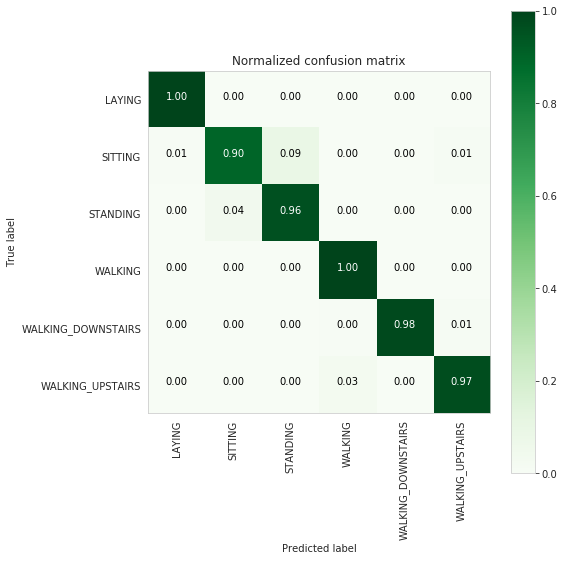

In [36]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, x_train, y_train, x_test, y_test, class_labels=labels)

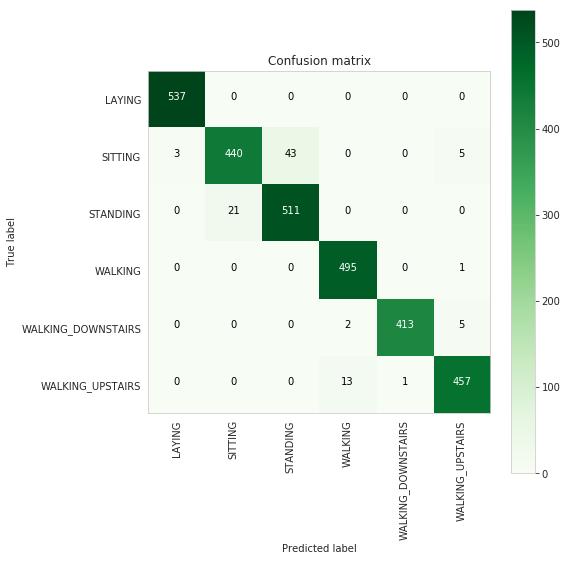

In [38]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(lr_svc_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [39]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=8, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 8}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9462731229597389



# RBF Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:08:12.015120


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.957090


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]
-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

         micro avg       0.96

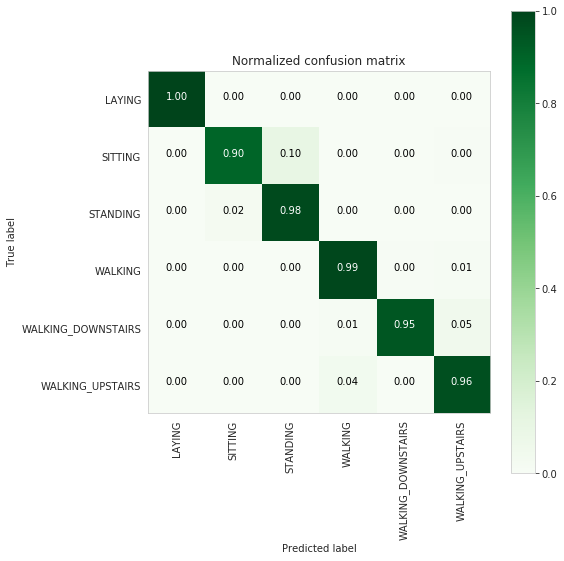

In [40]:
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, x_train, y_train, x_test, y_test, class_labels=labels)

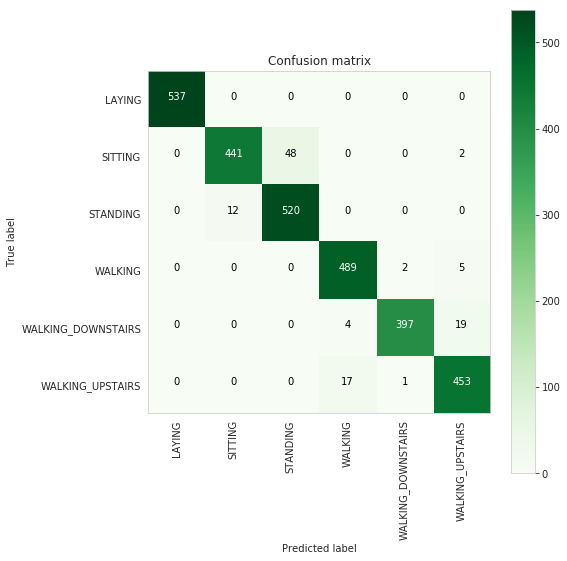

In [41]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rbf_svm_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [42]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9440968443960827



# Decision Tree with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:12.796744


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.011969


---------------------
|      Accuracy      |
---------------------

    0.8635900916185952


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 386 105   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 471  17   8]
 [  0   0   0  20 338  62]
 [  0   0   0  73  24 374]]
-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.89      0.80      0.85       420
  WALKING_UPSTAIRS       0.84      0.79      0.82       471

         micro avg       0.86

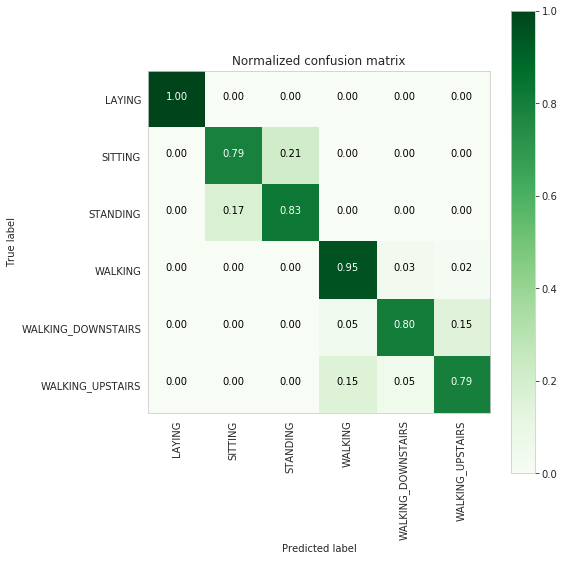

In [43]:
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, x_train, y_train, x_test, y_test, class_labels=labels)

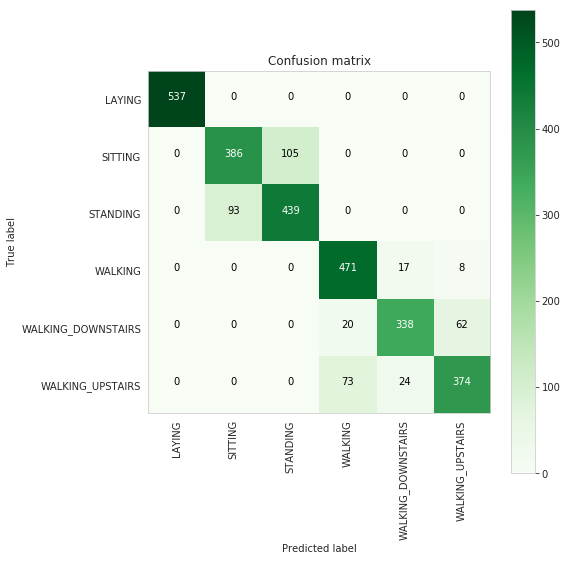

In [44]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(dt_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [45]:
print_grid_search_attributes(dt_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 7}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.838411316648531



# Random Forest Classifier with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:06:10.175016


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.036900


---------------------
|      Accuracy      |
---------------------

    0.9121140142517815


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 410  81   0   0   0]
 [  0  40 492   0   0   0]
 [  0   0   0 483  11   2]
 [  0   0   0  31 343  46]
 [  0   0   0  42   6 423]]
-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.84      0.87       491
          STANDING       0.86      0.92      0.89       532
           WALKING       0.87      0.97      0.92       496
WALKING_DOWNSTAIRS       0.95      0.82      0.88       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

         micro avg       0.91

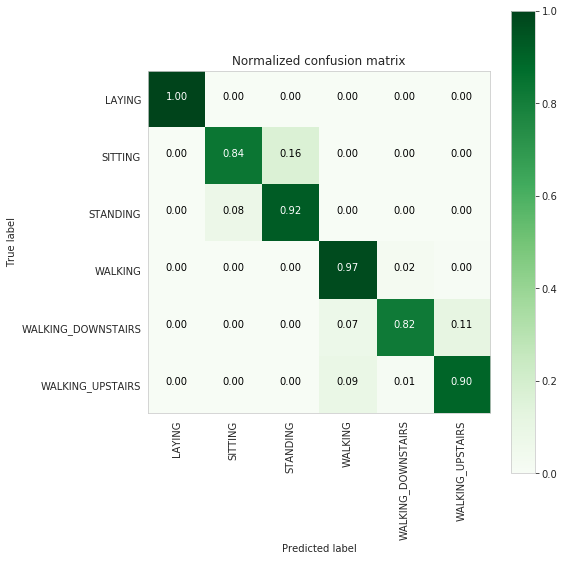

In [46]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, x_train, y_train, x_test, y_test, class_labels=labels)

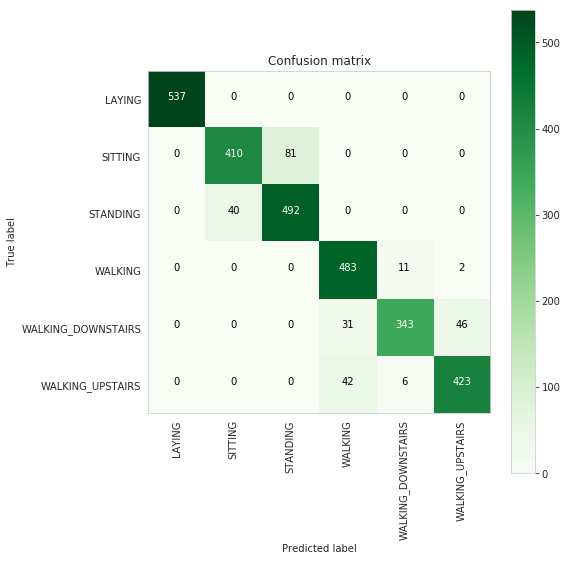

In [47]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rfc_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [48]:
print_grid_search_attributes(rfc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 7, 'n_estimators': 70}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9182535364526659



# Gradient Boosted Decision Trees With GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 1:26:52.509466


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.280228


---------------------
|      Accuracy      |
---------------------

    0.9226331862911435


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 398  91   0   0   2]
 [  0  37 495   0   0   0]
 [  0   0   0 483   7   6]
 [  0   0   0  10 374  36]
 [  0   1   0  32   6 432]]
-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.81      0.86       491
          STANDING       0.84      0.93      0.89       532
           WALKING       0.92      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
  WALKING_UPSTAIRS       0.91      0.92      0.91       471

         micro avg       0.92

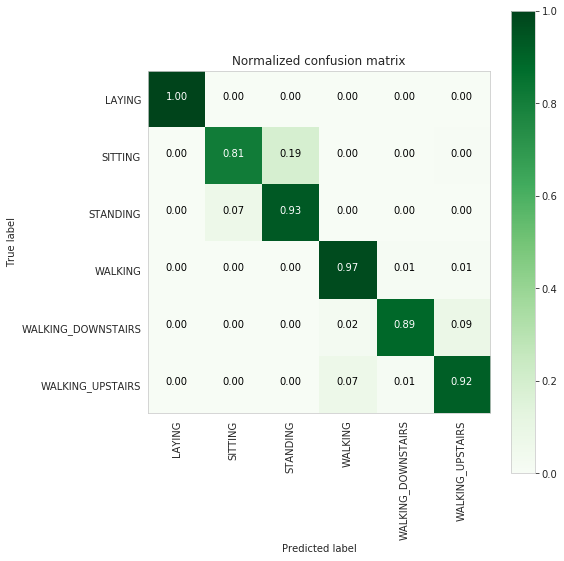

In [49]:
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, x_train, y_train, x_test, y_test, class_labels=labels)

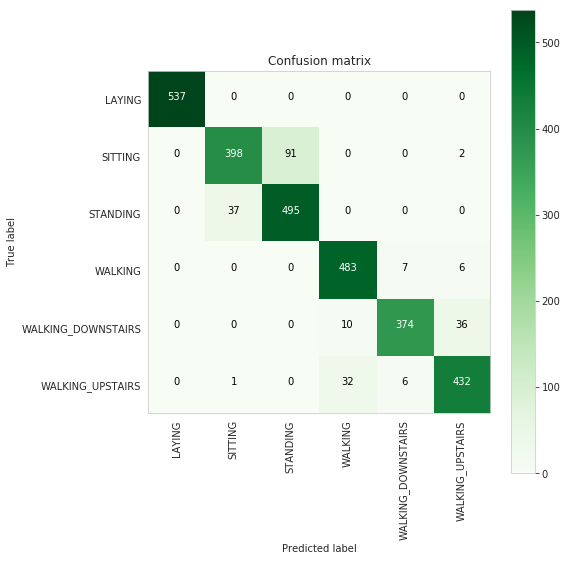

In [50]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(gbdt_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [51]:
print_grid_search_attributes(gbdt_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=160,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 5, 'n_estimators': 160}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
-------------

In [4]:
from prettytable import PrettyTable
ptable = PrettyTable()
model = ['Logistic Regression','Linear SVC','RBF SVM classifier','DecisionTree','Random Forest','GradientBoosting DT']
accuracy=[96.30,96.81,96.26,86.35,91.21,92.26]
error=[3.70,3.19,3.74,3.65,8.79,7.74 ]
number=[1,2,3,4,5,6]
ptable.add_column("s.no",number)
ptable.add_column("model",model)
ptable.add_column("accuracy",accuracy)
ptable.add_column("error",error)
print(ptable)

+------+---------------------+----------+-------+
| s.no |        model        | accuracy | error |
+------+---------------------+----------+-------+
|  1   | Logistic Regression |   96.3   |  3.7  |
|  2   |      Linear SVC     |  96.81   |  3.19 |
|  3   |  RBF SVM classifier |  96.26   |  3.74 |
|  4   |     DecisionTree    |  86.35   |  3.65 |
|  5   |    Random Forest    |  91.21   |  8.79 |
|  6   | GradientBoosting DT |  92.26   |  7.74 |
+------+---------------------+----------+-------+


In [29]:
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Data directory
DATADIR = 'UCI_HAR_Dataset'

# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z",]

In [30]:
# Utility function to print the confusion matrix
def confusion_matrix_dl(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])
    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [31]:
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [32]:
epochs = 30
batch_size = 16
n_hidden = 32

In [33]:
x_train, x_test, y_train, y_test = load_data()

In [34]:
timesteps = len(x_train[0])
input_dim = len(x_train[0][0])
n_classes = _count_classes(y_train)

print(timesteps)
print(input_dim)
print(len(x_train))

128
9
7352


In [35]:
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [37]:
model.fit(x_train,
          y_train,
          batch_size=batch_size,
          validation_data=(x_test, y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 206s 28ms/step - loss: 1.3093 - acc: 0.4378 - val_loss: 1.1394 - val_acc: 0.4764
Epoch 2/30
7352/7352 [==============================] - 151s 21ms/step - loss: 0.9774 - acc: 0.5779 - val_loss: 0.9096 - val_acc: 0.5989
Epoch 3/30
7352/7352 [==============================] - 150s 20ms/step - loss: 0.7981 - acc: 0.6420 - val_loss: 0.7901 - val_acc: 0.5999
Epoch 4/30
7352/7352 [==============================] - 152s 21ms/step - loss: 0.6933 - acc: 0.6642 - val_loss: 0.7664 - val_acc: 0.6081
Epoch 5/30
7352/7352 [==============================] - 167s 23ms/step - loss: 0.6551 - acc: 0.6885 - val_loss: 0.7057 - val_acc: 0.6478
Epoch 6/30
7352/7352 [==============================] - 215s 29ms/step - loss: 0.6012 - acc: 0.7144 - val_loss: 0.9808 - val_acc: 0.6695
Epoch 7/30
7352/7352 [==============================] - 171s 23ms/step - loss: 0.5703 - acc: 0.7618 - val_loss: 0.6554 - val_acc: 

In [38]:
print(confusion_matrix_dl(y_test, model.predict(x_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0        27        0                   0   
SITTING                  0      382       103        0                   3   
STANDING                 0       89       442        0                   0   
WALKING                  0        1         0      475                   3   
WALKING_DOWNSTAIRS       0        0         0        4                 409   
WALKING_UPSTAIRS         0        0         1       21                  14   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            3  
STANDING                           1  
WALKING                           17  
WALKING_DOWNSTAIRS                 7  
WALKING_UPSTAIRS                 435  


In [39]:
score = model.evaluate(x_test, y_test)

2947/2947 [==============================] - 14s 5ms/step


In [40]:
score

[0.3527067980722644, 0.9002375296912114]

In [41]:
n_epochs = 30
n_batch = 16
n_classes = _count_classes(y_train)

# Bias regularizer value - we will use elasticnet
reg = L1L2(0.01, 0.01)

In [42]:
def plot_confusion_matrix_lstm(y_test, y_predict):
    result = confusion_matrix(y_test, y_predict)

    plt.figure(figsize=(12, 10))
    sns.heatmap(result, 
                xticklabels= list(ACTIVITIES.values()), 
                yticklabels=list(ACTIVITIES.values()), 
                annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  
    
# Plot train and cross validation loss
def plot_train_cv_loss(trained_model, epochs, colors=['b']):
    fig, ax = plt.subplots(1,1)    
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Categorical Crossentropy Loss')
    x_axis_values = list(range(1,epochs+1))

    validation_loss = trained_model.history['val_loss']
    train_loss = trained_model.history['loss']   
    
    ax.plot(x_axis_values, validation_loss, 'b', label="Validation Loss")
    ax.plot(x_axis_values, train_loss, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [43]:
model = Sequential()
model.add(LSTM(32, input_shape=(timesteps, input_dim), return_sequences=True,bias_regularizer=reg ))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(32))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 32)           128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 14,022
Trainable params: 13,958
Non-trainable params: 64
_______________________________________________________

In [44]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [45]:
start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 410s 56ms/step - loss: 1.5191 - acc: 0.6147 - val_loss: 1.0153 - val_acc: 0.6732
Epoch 2/30
7352/7352 [==============================] - 469s 64ms/step - loss: 0.9302 - acc: 0.7093 - val_loss: 0.8279 - val_acc: 0.6766
Epoch 3/30
7352/7352 [==============================] - 391s 53ms/step - loss: 0.6261 - acc: 0.8149 - val_loss: 0.4754 - val_acc: 0.8432
Epoch 4/30
7352/7352 [==============================] - 396s 54ms/step - loss: 0.4101 - acc: 0.8833 - val_loss: 0.3546 - val_acc: 0.8792
Epoch 5/30
7352/7352 [==============================] - 396s 54ms/step - loss: 0.3665 - acc: 0.8923 - val_loss: 0.3917 - val_acc: 0.8717
Epoch 6/30
7352/7352 [==============================] - 399s 54ms/step - loss: 0.3073 - acc: 0.9097 - val_loss: 0.8654 - val_acc: 0.7638
Epoch 7/30
7352/7352 [==============================] - 380s 52ms/step - loss: 0.3249 - acc: 0.8993 - val_loss: 0.3701 - val_acc: 

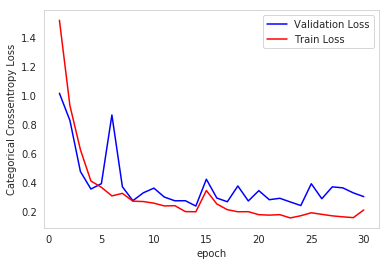

In [46]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)


Test Accuracy: 90.397014%



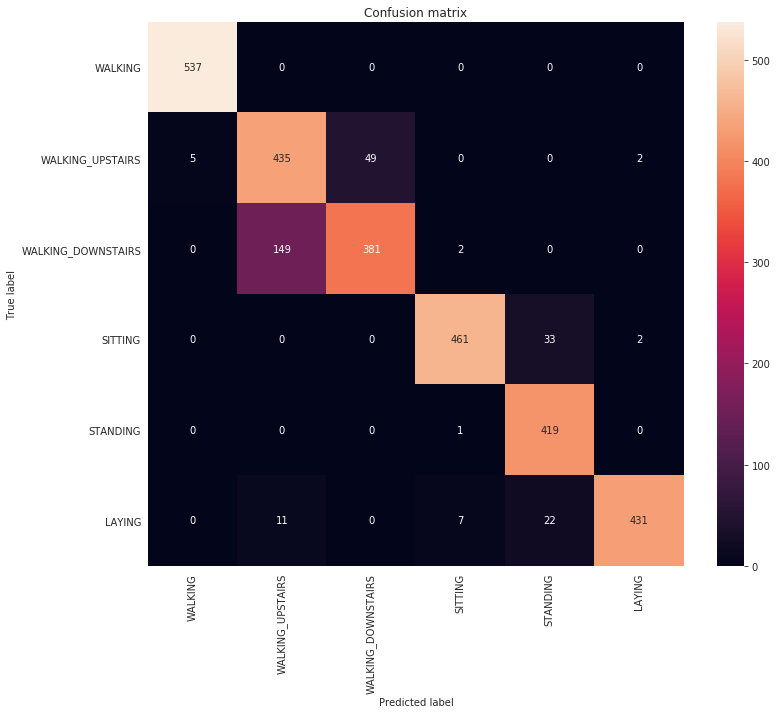

In [47]:
print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)

In [48]:
model = Sequential()
model.add(LSTM(48, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(32))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128, 48)           11136     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 48)           192       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 48)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                10368     
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
Total params: 21,894
Trainable params: 21,798
Non-trainable params: 96
_______________________________________________________

In [49]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [50]:
start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 443s 60ms/step - loss: 1.7482 - acc: 0.6009 - val_loss: 1.7611 - val_acc: 0.4204
Epoch 2/30
7352/7352 [==============================] - 425s 58ms/step - loss: 1.0198 - acc: 0.6918 - val_loss: 0.8123 - val_acc: 0.7221
Epoch 3/30
7352/7352 [==============================] - 449s 61ms/step - loss: 0.6638 - acc: 0.7712 - val_loss: 0.4950 - val_acc: 0.7913
Epoch 4/30
7352/7352 [==============================] - 463s 63ms/step - loss: 0.4485 - acc: 0.8362 - val_loss: 0.4111 - val_acc: 0.8755
Epoch 5/30
7352/7352 [==============================] - 518s 70ms/step - loss: 0.3713 - acc: 0.8753 - val_loss: 0.3606 - val_acc: 0.8673
Epoch 6/30
7352/7352 [==============================] - 634s 86ms/step - loss: 0.3536 - acc: 0.8863 - val_loss: 0.3570 - val_acc: 0.8812
Epoch 7/30
7352/7352 [==============================] - 708s 96ms/step - loss: 0.3311 - acc: 0.8981 - val_loss: 0.3917 - val_acc: 

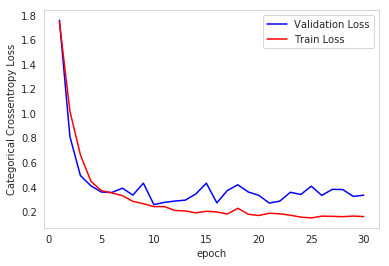

In [51]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)


Test Accuracy: 90.668476%



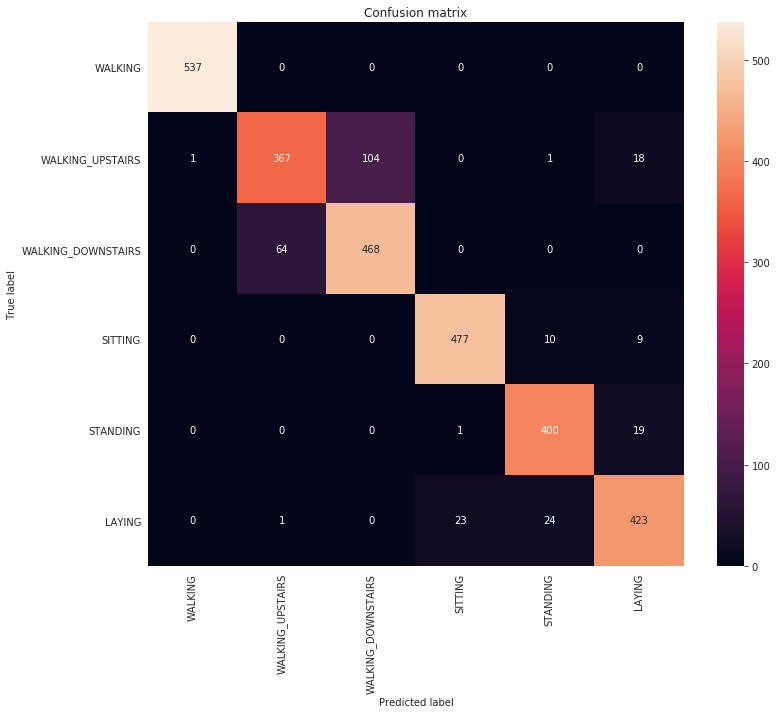

In [52]:
print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)

In [53]:
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(48))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 128, 64)           18944     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128, 64)           256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 128, 64)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 48)                21696     
_________________________________________________________________
dropout_7 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 294       
Total params: 41,190
Trainable params: 41,062
Non-trainable params: 128
______________________________________________________

In [54]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [55]:
start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 444s 60ms/step - loss: 1.8359 - acc: 0.6488 - val_loss: 1.2166 - val_acc: 0.7682
Epoch 2/30
7352/7352 [==============================] - 407s 55ms/step - loss: 0.8316 - acc: 0.8553 - val_loss: 0.5719 - val_acc: 0.8938
Epoch 3/30
7352/7352 [==============================] - 386s 53ms/step - loss: 0.4151 - acc: 0.9015 - val_loss: 0.3599 - val_acc: 0.8738
Epoch 4/30
7352/7352 [==============================] - 413s 56ms/step - loss: 0.2627 - acc: 0.9178 - val_loss: 0.2654 - val_acc: 0.8965
Epoch 5/30
7352/7352 [==============================] - 470s 64ms/step - loss: 0.1989 - acc: 0.9338 - val_loss: 0.2636 - val_acc: 0.9023
Epoch 6/30
7352/7352 [==============================] - 450s 61ms/step - loss: 0.2335 - acc: 0.9215 - val_loss: 0.3488 - val_acc: 0.8951
Epoch 7/30
7352/7352 [==============================] - 454s 62ms/step - loss: 0.1874 - acc: 0.9331 - val_loss: 0.3077 - val_acc: 

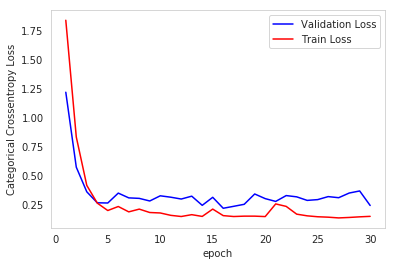

In [56]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)


Test Accuracy: 91.584662%



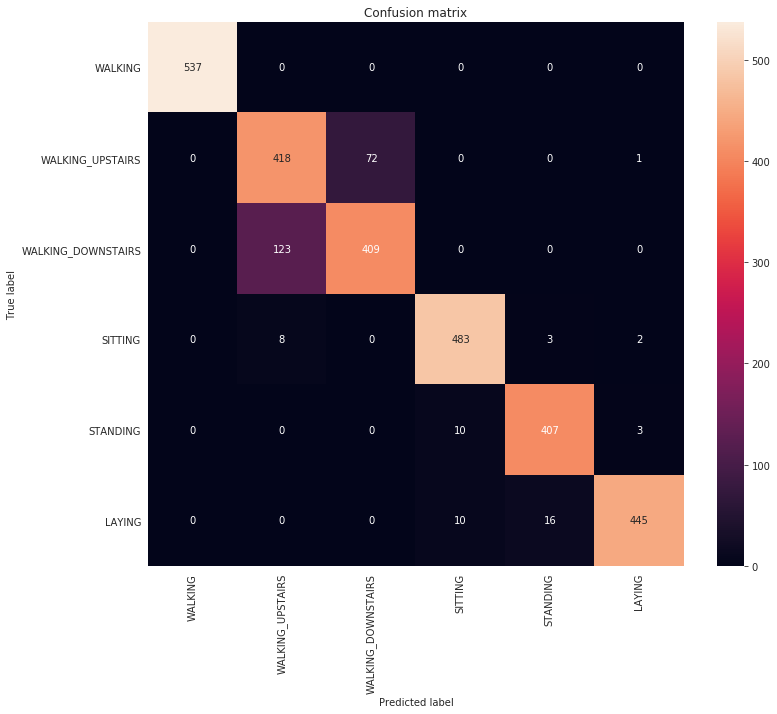

In [57]:
print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)

In [58]:
n_epochs = 30
n_batch = 16
n_classes = _count_classes(y_train)

# Bias regularizer value - we will use elasticnet
reg = L1L2(0.01, 0.01)

In [59]:
model = Sequential()
model.add(LSTM(32, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.70))
model.add(LSTM(32))
model.add(Dropout(0.70))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 32)           128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 198       
Total params: 14,022
Trainable params: 13,958
Non-trainable params: 64
_______________________________________________________

In [60]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [61]:










start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 419s 57ms/step - loss: 1.7705 - acc: 0.5203 - val_loss: 1.2487 - val_acc: 0.6552
Epoch 2/30
7352/7352 [==============================] - 371s 50ms/step - loss: 1.1058 - acc: 0.6367 - val_loss: 0.8550 - val_acc: 0.6298
Epoch 3/30
7352/7352 [==============================] - 431s 59ms/step - loss: 0.8730 - acc: 0.6479 - val_loss: 0.7240 - val_acc: 0.6990
Epoch 4/30
7352/7352 [==============================] - 410s 56ms/step - loss: 0.7359 - acc: 0.6991 - val_loss: 0.6223 - val_acc: 0.7221
Epoch 5/30
7352/7352 [==============================] - 389s 53ms/step - loss: 0.7098 - acc: 0.7119 - val_loss: 0.5728 - val_acc: 0.7570
Epoch 6/30
7352/7352 [==============================] - 409s 56ms/step - loss: 0.6183 - acc: 0.7572 - val_loss: 0.5067 - val_acc: 0.7645
Epoch 7/30
7352/7352 [==============================] - 382s 52ms/step - loss: 0.6092 - acc: 0.7643 - val_loss: 0.5650 - val_acc: 

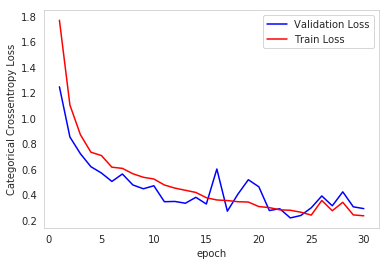

In [62]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)


Test Accuracy: 91.109603%



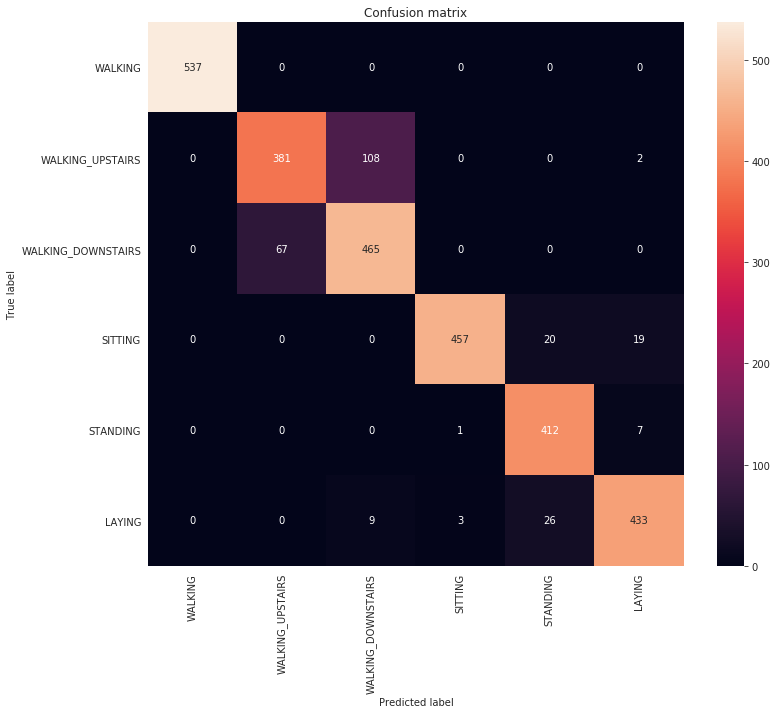

In [63]:
print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)

In [64]:
# Model execution
model = Sequential()
model.add(LSTM(48, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.70))
model.add(LSTM(32))
model.add(Dropout(0.70))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 128, 48)           11136     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 48)           192       
_________________________________________________________________
dropout_10 (Dropout)         (None, 128, 48)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                10368     
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 198       
Total params: 21,894
Trainable params: 21,798
Non-trainable params: 96
_______________________________________________________

In [65]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [66]:
start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 338s 46ms/step - loss: 1.9828 - acc: 0.5291 - val_loss: 1.3308 - val_acc: 0.6332
Epoch 2/30
7352/7352 [==============================] - 327s 45ms/step - loss: 1.2492 - acc: 0.6084 - val_loss: 1.0217 - val_acc: 0.5982
Epoch 3/30
7352/7352 [==============================] - 324s 44ms/step - loss: 0.9409 - acc: 0.6287 - val_loss: 0.7980 - val_acc: 0.6559
Epoch 4/30
7352/7352 [==============================] - 325s 44ms/step - loss: 0.7955 - acc: 0.6533 - val_loss: 0.7412 - val_acc: 0.6861
Epoch 5/30
7352/7352 [==============================] - 331s 45ms/step - loss: 0.7419 - acc: 0.6658 - val_loss: 0.7852 - val_acc: 0.6749
Epoch 6/30
7352/7352 [==============================] - 348s 47ms/step - loss: 0.7076 - acc: 0.6874 - val_loss: 0.7030 - val_acc: 0.6698
Epoch 7/30
7352/7352 [==============================] - 354s 48ms/step - loss: 0.6912 - acc: 0.6918 - val_loss: 0.6123 - val_acc: 

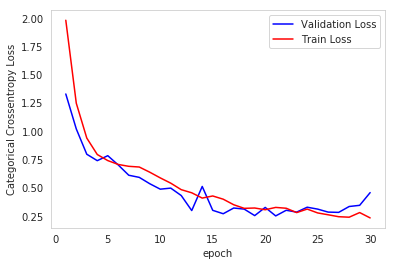

In [67]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)


Test Accuracy: 88.428911%



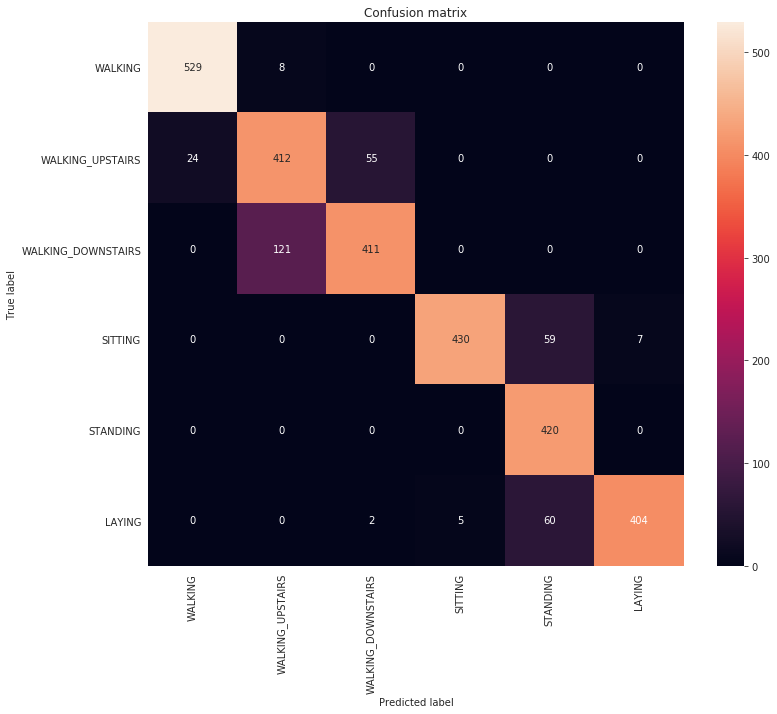

In [68]:
print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)

In [69]:
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.70))
model.add(LSTM(48))
model.add(Dropout(0.70))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 128, 64)           18944     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 64)           256       
_________________________________________________________________
dropout_12 (Dropout)         (None, 128, 64)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 48)                21696     
_________________________________________________________________
dropout_13 (Dropout)         (None, 48)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 294       
Total params: 41,190
Trainable params: 41,062
Non-trainable params: 128
______________________________________________________

In [70]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [71]:
start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 316s 43ms/step - loss: 1.9874 - acc: 0.5812 - val_loss: 1.3741 - val_acc: 0.6108
Epoch 2/30
7352/7352 [==============================] - 315s 43ms/step - loss: 1.2185 - acc: 0.6079 - val_loss: 0.9498 - val_acc: 0.6468
Epoch 3/30
7352/7352 [==============================] - 310s 42ms/step - loss: 0.8627 - acc: 0.6610 - val_loss: 0.7027 - val_acc: 0.6427
Epoch 4/30
7352/7352 [==============================] - 310s 42ms/step - loss: 0.6527 - acc: 0.7375 - val_loss: 0.6197 - val_acc: 0.7323
Epoch 5/30
7352/7352 [==============================] - 311s 42ms/step - loss: 0.6092 - acc: 0.7684 - val_loss: 0.4838 - val_acc: 0.8195
Epoch 6/30
7352/7352 [==============================] - 311s 42ms/step - loss: 0.5057 - acc: 0.8232 - val_loss: 0.5972 - val_acc: 0.8022
Epoch 7/30
7352/7352 [==============================] - 309s 42ms/step - loss: 0.4961 - acc: 0.8273 - val_loss: 0.5278 - val_acc: 

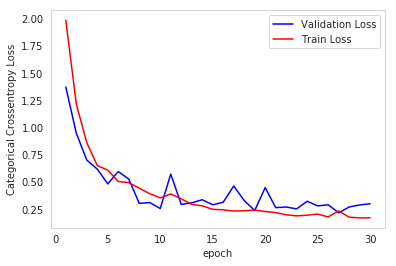

In [72]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)


Test Accuracy: 91.856125%



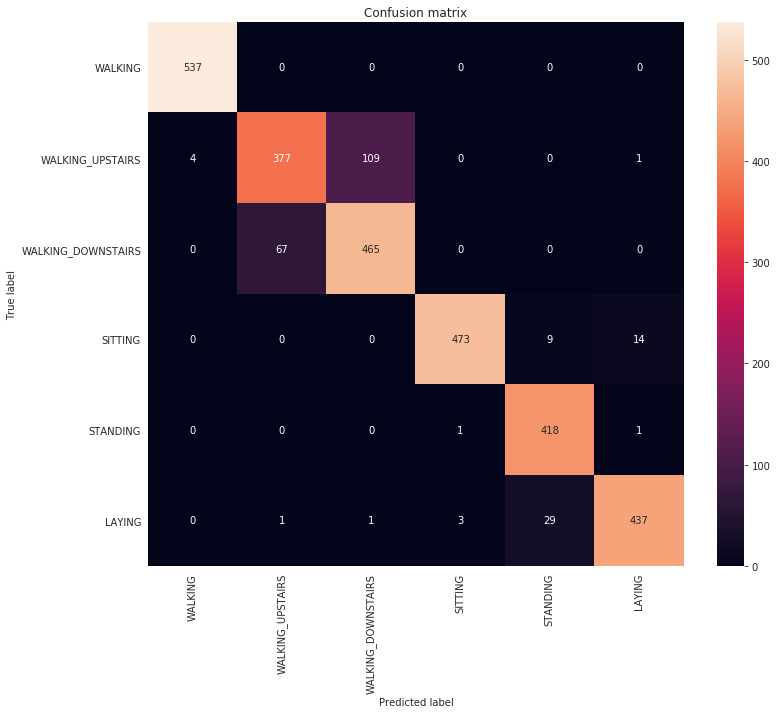

In [73]:


print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)



# Procedure Followed :



STEP 1 :- Load the data and split into training_data and test_data

STEP 2:-Try out different LSTM architectures

STEP 3:- Find test score and accuracy for each model

STEP 4:- Draw confusion matrix using seaborn heatmap for each model


# Conclusion

In [5]:
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model Comparision "
ptable.field_names = ["LSTM Layers",'No. of Neurons in LSTM Layer','Dropout', 'Best Epoch']
ptable.add_row(["2","32","0.50","10"])
ptable.add_row(["2","48","0.50","7"])
ptable.add_row(["2","64","0.50","9"])
ptable.add_row(["\n","\n","\n","\n"])
ptable.add_row(["2","32","0.70","9"])
ptable.add_row(["2","48","0.70","16"])
ptable.add_row(["2","64","0.70","7"])
print(ptable)

+-------------+------------------------------+---------+------------+
| LSTM Layers | No. of Neurons in LSTM Layer | Dropout | Best Epoch |
+-------------+------------------------------+---------+------------+
|      2      |              32              |   0.50  |     10     |
|      2      |              48              |   0.50  |     7      |
|      2      |              64              |   0.50  |     9      |
|             |                              |         |            |
|             |                              |         |            |
|      2      |              32              |   0.70  |     9      |
|      2      |              48              |   0.70  |     16     |
|      2      |              64              |   0.70  |     7      |
+-------------+------------------------------+---------+------------+


From all the plots, we have observed that 64 neurons with 0.70 dropout rate will be the good choice, among all the models